# 1. Adan Preprocessing

Reference: https://github.com/AdenRajput/NSL_KDD.git

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# open the .txt file here in the csv format
df = pd.read_csv('KDDTrain+.csv',header=None)

# show all the columns
pd.set_option('display.max_columns', None)

# got from Kaggle NB
df.columns = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level']

In [ ]:
print(df.shape)
df.head()

(125973, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
# add a list of attack types i.e., Back, Land, Neptune etc.,

attack_type = ['normal', 'back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 'imap', 'ipsweep', 'land', 'loadmodule',
                'multihop', 'neptune', 'nmap', 'perl', 'phf', 'pod', 'portsweep', 'rootkit', 'satan', 'smurf',
                'spy', 'teardrop', 'warezclient', 'warezmaster']

dos = ['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop']
u2r = ['buffer_overflow', 'loadmodule', 'perl', 'rootkit']
r2l = ['ftp_write', 'guess_passwd', 'imap', 'multihop', 'phf', 'spy', 'warezclient', 'warezmaster']
probe = ['ipsweep', 'nmap', 'portsweep', 'satan']


attack_class = ['normal', 'dos', 'u2r', 'r2l', 'r2l', 'r2l', 'probe', 'dos', 'u2r', 'r2l', 'dos', 'probe', 'u2r', 'r2l',
                'dos', 'probe', 'u2r', 'probe', 'dos', 'r2l', 'dos', 'r2l', 'r2l']

In [ ]:
# map the attack types to the attack class
df['attack_class'] = df['outcome'].map(lambda x: attack_class[attack_type.index(x)])

In [ ]:
# add new variables class label (binary)) and attack type (multi-class), attack class (multi-class)
df['class_label'] = df.attack_class.apply(lambda v: 0 if v=='normal' else 1)

# change the name of the outcome column as attack_type
df.rename(columns={'outcome':'attack_type'}, inplace=True)

In [ ]:
df['attack_class'].value_counts()

normal    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: attack_class, dtype: int64

In [ ]:
df.groupby('attack_class')['attack_type'].value_counts()

attack_class  attack_type    
dos           neptune            41214
              smurf               2646
              back                 956
              teardrop             892
              pod                  201
              land                  18
normal        normal             67343
probe         satan               3633
              ipsweep             3599
              portsweep           2931
              nmap                1493
r2l           warezclient          890
              guess_passwd          53
              warezmaster           20
              imap                  11
              ftp_write              8
              multihop               7
              phf                    4
              spy                    2
u2r           buffer_overflow       30
              rootkit               10
              loadmodule             9
              perl                   3
Name: attack_type, dtype: int64

In [ ]:
print(df.shape)
df.head()

(125973, 45)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,level,attack_class,class_label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos,1
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal,0


In [ ]:
# drop the num_outbound_cmds column as it has only one value
df.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [ ]:
# made a copy of original dataframe
df_copy = df.copy()
# save the data as a csv file
df.to_csv('NSL_KDD_Train_labeled_preprocessed.csv', index=False)

df_filtered = df[df['attack_class'] != 'normal']
df_filtered.to_csv('NSL_KDD_Train_labeled_preprocessed_filtered.csv', index=False)

In [ ]:
df_numerical = df.select_dtypes(include=np.number)
df_categorical = df.select_dtypes(exclude=np.number)

In [ ]:
# find the correlation coefficient between the numerical variables with class label and make it absolute
corr = abs(df_numerical.corr()['class_label']).sort_values(ascending=False)
# print(corr)

# pick only correlation values greater than 0.5
corr = corr[corr > 0.5]
print(corr)

class_label                 1.000000
same_srv_rate               0.751913
dst_host_srv_count          0.722535
dst_host_same_srv_rate      0.693803
logged_in                   0.690171
dst_host_srv_serror_rate    0.654985
dst_host_serror_rate        0.651842
serror_rate                 0.650652
srv_serror_rate             0.648289
count                       0.576444
Name: class_label, dtype: float64


['class_label', 'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'dst_host_srv_serror_rate', 'dst_host_serror_rate', 'serror_rate', 'srv_serror_rate', 'count']


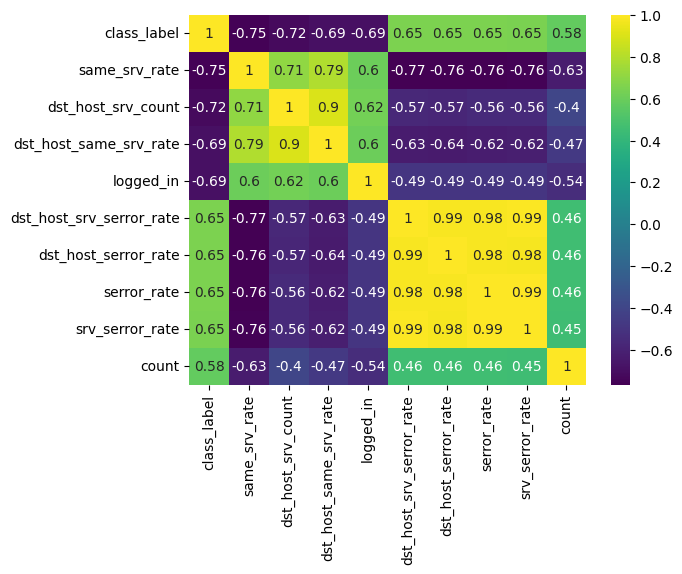

In [ ]:
# now save the above correlation values in a list and check for direct and inverse relation between the variables wrt class label
corr_list = corr.index.tolist()
print(corr_list)

# now plot the correlation matrix
# plt.figure(figsize=(15,15))
sns.heatmap(df_numerical[corr_list].corr(), annot=True, cmap='viridis')
plt.show()

In [ ]:
# do one hot encoding for the categorical variables and check its correlation with class label
df_categorical = pd.get_dummies(df_categorical, drop_first=True)
df_categorical.head()

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_type_buffer_overflow,attack_type_ftp_write,attack_type_guess_passwd,attack_type_imap,attack_type_ipsweep,attack_type_land,attack_type_loadmodule,attack_type_multihop,attack_type_neptune,attack_type_nmap,attack_type_normal,attack_type_perl,attack_type_phf,attack_type_pod,attack_type_portsweep,attack_type_rootkit,attack_type_satan,attack_type_smurf,attack_type_spy,attack_type_teardrop,attack_type_warezclient,attack_type_warezmaster,attack_class_normal,attack_class_probe,attack_class_r2l,attack_class_u2r
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# now concatenate the numerical and categorical variables
df_new = pd.concat([df_numerical, df_categorical], axis=1)
df_new.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,class_label,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_type_buffer_overflow,attack_type_ftp_write,attack_type_guess_passwd,attack_type_imap,attack_type_ipsweep,attack_type_land,attack_type_loadmodule,attack_type_multihop,attack_type_neptune,attack_type_nmap,attack_type_normal,attack_type_perl,attack_type_phf,attack_type_pod,attack_type_portsweep,attack_type_rootkit,attack_type_satan,attack_type_smurf,attack_type_spy,attack_type_teardrop,attack_type_warezclient,attack_type_warezmaster,attack_class_normal,attack_class_probe,attack_class_r2l,attack_class_u2r
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# now find the correlation between the new dataframe and class label
corr = abs(df_new.corr()['class_label']).sort_values(ascending=False)
corr = corr[corr > 0.5]
# corr_list = corr.index.tolist()
# print(corr_list)
corr

attack_class_normal         1.000000
attack_type_normal          1.000000
class_label                 1.000000
flag_SF                     0.756286
same_srv_rate               0.751913
attack_type_neptune         0.747336
dst_host_srv_count          0.722535
dst_host_same_srv_rate      0.693803
logged_in                   0.690171
dst_host_srv_serror_rate    0.654985
dst_host_serror_rate        0.651842
serror_rate                 0.650652
flag_S0                     0.650206
srv_serror_rate             0.648289
count                       0.576444
service_http                0.562312
Name: class_label, dtype: float64

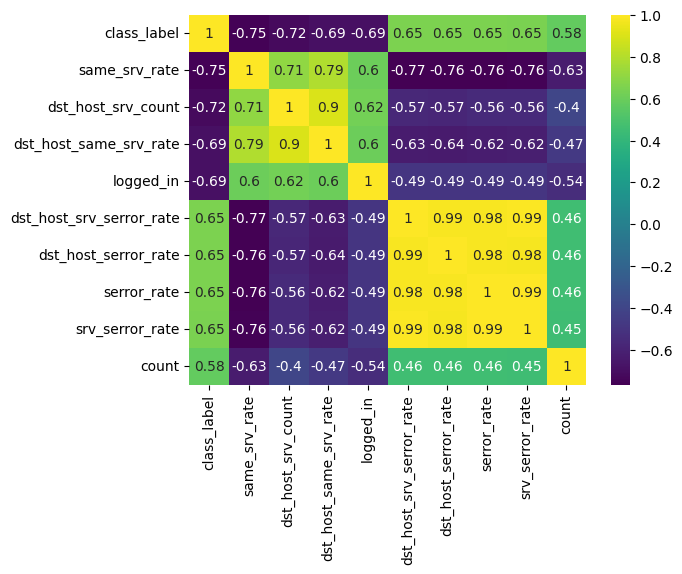

In [ ]:
# now plot the correlation matrix
# plt.figure(figsize=(15,15))
sns.heatmap(df_new[corr_list].corr(), annot=True, cmap='viridis')
plt.show()

In [ ]:
df_numerical = df.select_dtypes(include=np.number)
df_categorical = df.select_dtypes(exclude=np.number)


# label encoding for the categorical variables in df data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_e_categorical = df_categorical.apply(le.fit_transform)
# df_e_categorical.head()

# normalize the numerical variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_n_numerical = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)


# concat the encoded and normalized datasets
df_ne = pd.concat([df_n_numerical, df_e_categorical], axis=1)
# df_ne.head()

# drop attack_class and attack_type columns
df_ne.drop(['attack_class', 'attack_type'], axis=1, inplace=True)
df_ne.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,class_label,protocol_type,service,flag
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.952381,0.0,1,20,9
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025440,0.001957,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.714286,0.0,2,44,9
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.240705,0.011742,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.904762,1.0,1,49,5
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009785,0.009785,0.2,0.2,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1.000000,0.0,1,24,9
4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058708,0.062622,0.0,0.0,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000,0.0,1,24,9


In [ ]:
# correlation matrix wrt class label and absolute values greater than 0.5 only
corr = abs(df_ne.corr()['class_label']).sort_values(ascending=False)
corr = corr[corr > 0.5]
corr

class_label                 1.000000
same_srv_rate               0.751913
dst_host_srv_count          0.722535
dst_host_same_srv_rate      0.693803
logged_in                   0.690171
dst_host_srv_serror_rate    0.654985
dst_host_serror_rate        0.651842
serror_rate                 0.650652
srv_serror_rate             0.648289
flag                        0.647073
count                       0.576444
Name: class_label, dtype: float64

(88181, 41) (37792, 41) (88181,) (37792,)
16
Index(['logged_in', 'count', 'serror_rate', 'same_srv_rate', 'diff_srv_rate',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'level', 'protocol_type', 'service',
       'flag'],
      dtype='object')


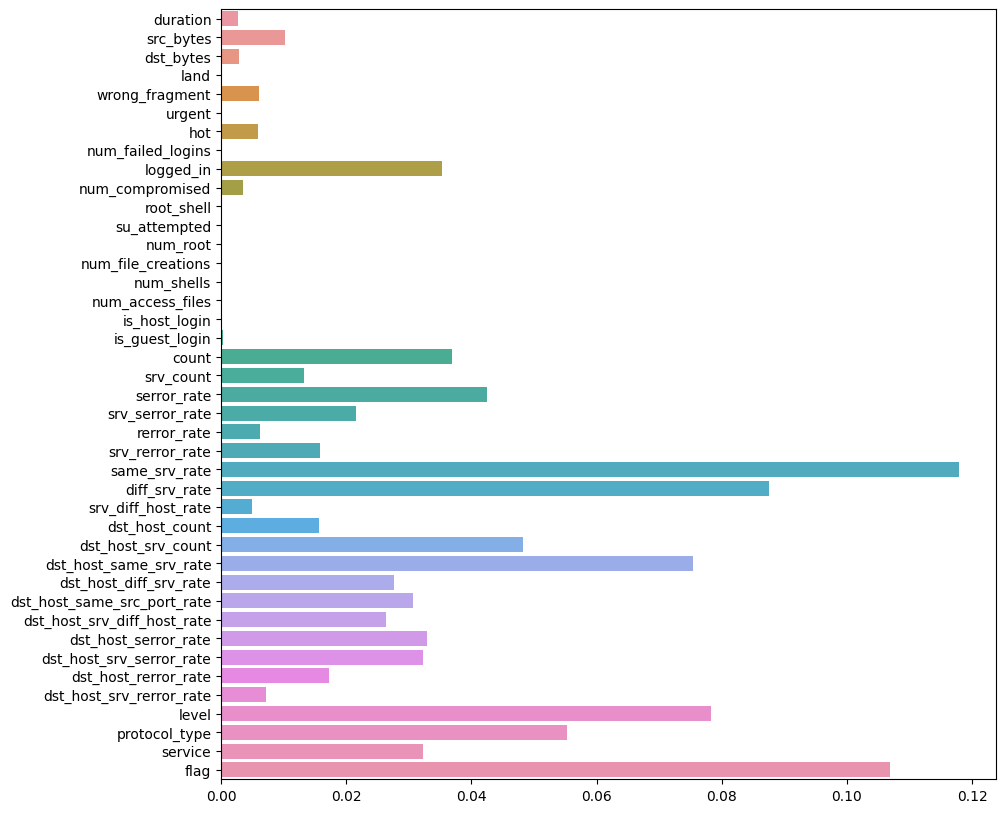

In [ ]:
# perfrom random forest feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

X = df_ne.drop(['class_label'], axis=1)
y = df_ne['class_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# fit the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# select the features
sel = SelectFromModel(rf)
sel.fit(X_train, y_train)

# make a list of the selected features
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

# plot all the selected features
plt.figure(figsize=(10,10))
sns.barplot(x=sel.estimator_.feature_importances_, y=X_train.columns)
plt.show()

(88181, 41) (37792, 41) (88181,) (37792,)
5
Index(['same_srv_rate', 'dst_host_same_srv_rate', 'level', 'protocol_type',
       'flag'],
      dtype='object')


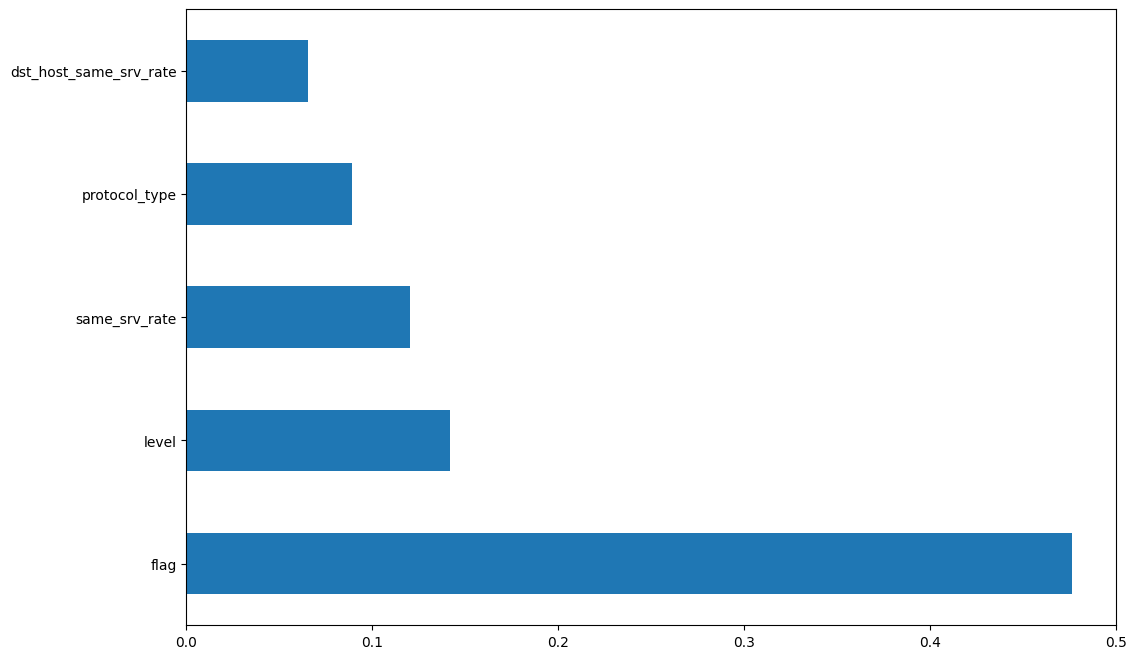

In [ ]:
# best features by gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

X = df_ne.drop(['class_label'], axis=1)
y = df_ne['class_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# fit the model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# select the features
sel = SelectFromModel(gb)
sel.fit(X_train, y_train)

# make a list of the selected features
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

# plot the feature importance
plt.figure(figsize=(12,8))
feat_importances = pd.Series(gb.feature_importances_, index=X_train.columns)
feat_importances.nlargest().plot(kind='barh')
plt.show()

In [ ]:
# drop attack_class and attack_type columns
df.drop(['attack_class', 'attack_type'], axis=1, inplace=True)

In [ ]:
df_numerical = df.select_dtypes(include=np.number)
df_categorical = df.select_dtypes(exclude=np.number)

In [ ]:
# one hot encoding of the categorical variables
df_he_categorical = pd.get_dummies(df_categorical, drop_first=True)
df_he_categorical.head()

# normalize the numerical variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_n_numerical = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)

# concat the encoded and normalized datasets
df_he_n = pd.concat([df_n_numerical, df_he_categorical], axis=1)
df_he_n.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,class_label,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.952381,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025440,0.001957,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.714286,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.240705,0.011742,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.904762,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009785,0.009785,0.2,0.2,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1.000000,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058708,0.062622,0.0,0.0,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


11
Index(['logged_in', 'count', 'same_srv_rate', 'dst_host_same_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_serror_rate', 'level',
       'service_domain_u', 'service_eco_i', 'service_ecr_i', 'flag_SF'],
      dtype='object')


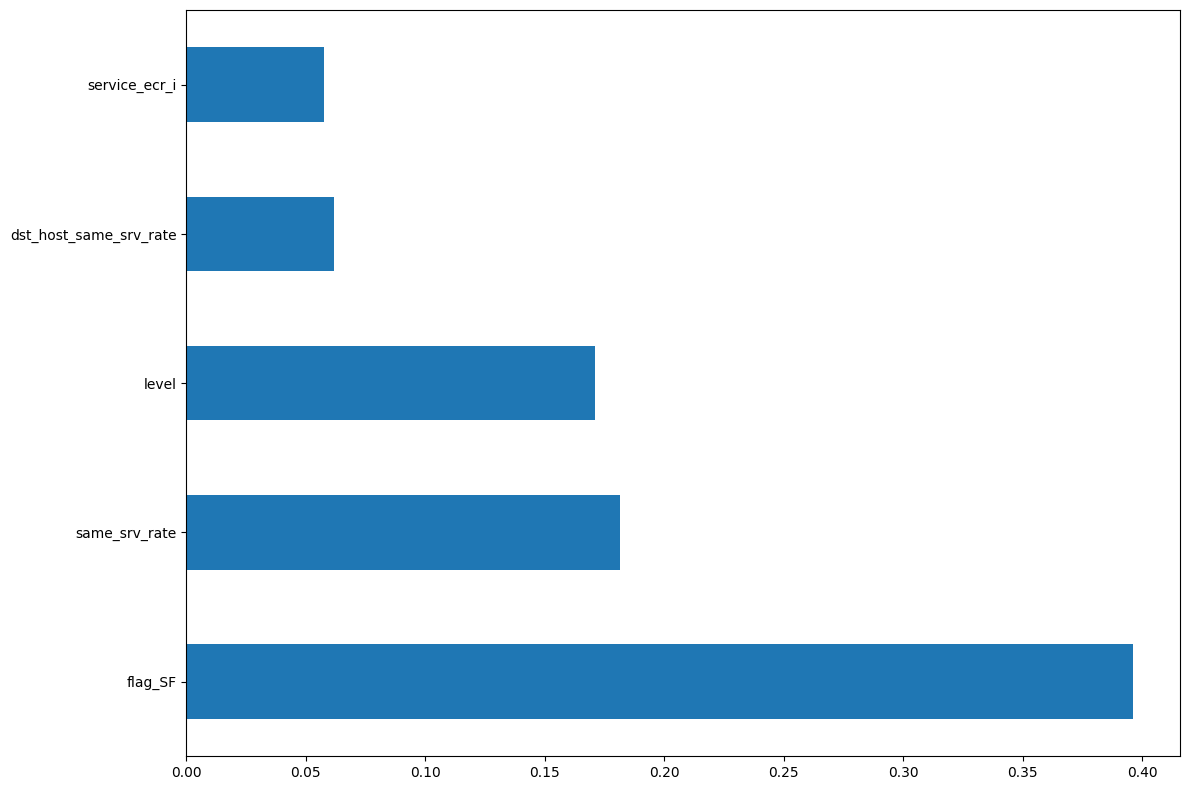

In [ ]:
# fit the model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# select the features
sel = SelectFromModel(gb)
sel.fit(X_train, y_train)

# make a list of the selected features
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

# plot the feature importance
plt.figure(figsize=(12,8))
feat_importances = pd.Series(gb.feature_importances_, index=X_train.columns)
feat_importances.nlargest().plot(kind='barh')
plt.tight_layout()

14
Index(['src_bytes', 'dst_bytes', 'logged_in', 'count', 'diff_srv_rate',
       'dst_host_same_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_serror_rate', 'level', 'service_domain_u', 'service_ecr_i',
       'service_http', 'service_smtp', 'flag_S1'],
      dtype='object')


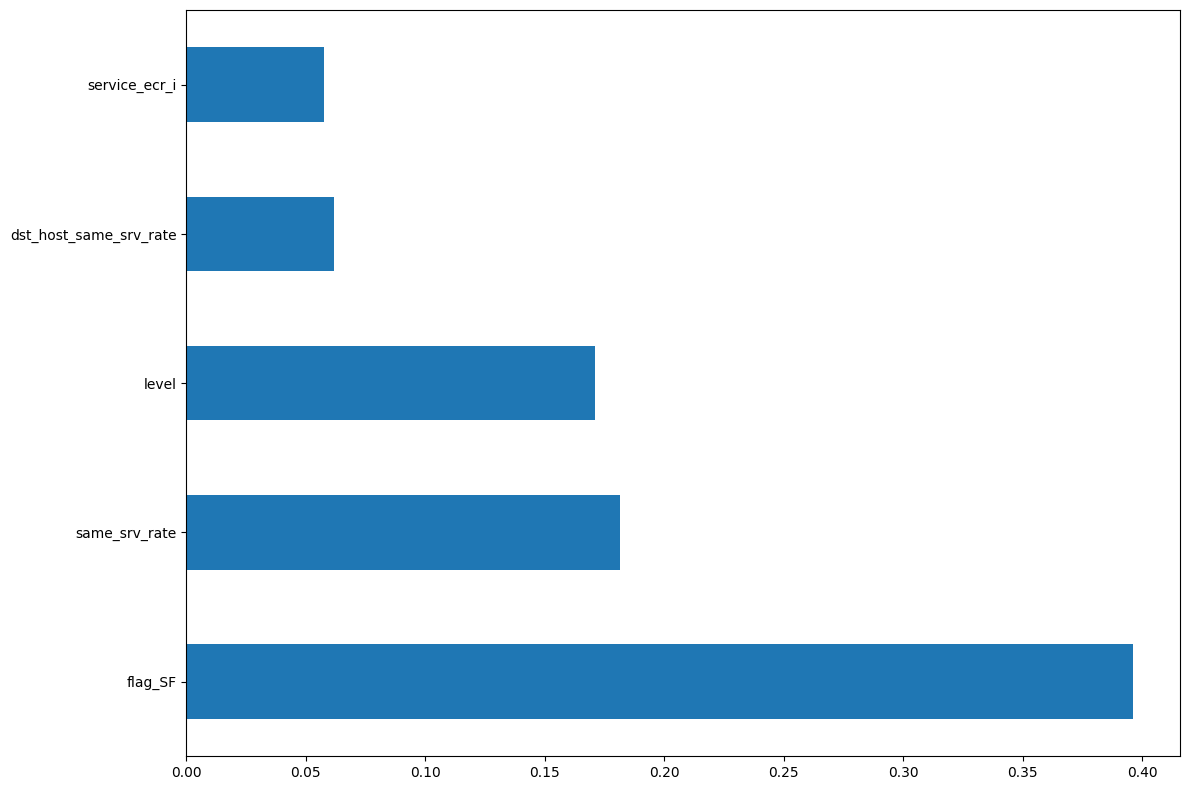

In [ ]:
# fit the model
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# select the features
sel = SelectFromModel(xgb)
sel.fit(X_train, y_train)

# make a list of the selected features
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

# plot the feature importance
plt.figure(figsize=(12,8))
feat_importances = pd.Series(gb.feature_importances_, index=X_train.columns)
feat_importances.nlargest().plot(kind='barh')
plt.tight_layout()
plt.show()

In [ ]:
# make a dataframe of logged_in,count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,level,service,flag
df_sel_feat = df_copy[['logged_in','count','dst_host_same_srv_rate',
                  'dst_host_same_src_port_rate','dst_host_serror_rate',
                  'level','service','flag','class_label','attack_class','attack_type']]
# to csv
df_sel_feat.to_csv('NSL_KDD_sel_feat.csv', index=False)
df_sel_feat.head()

,logged_in,count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,level,service,flag,class_label,attack_class,attack_type
0,0,2,0.17,0.17,0.00,20,ftp_data,SF,0,normal,normal
1,0,13,0.00,0.88,0.00,15,other,SF,0,normal,normal
2,0,123,0.10,0.00,1.00,19,private,S0,1,dos,neptune
3,1,5,1.00,0.03,0.03,21,http,SF,0,normal,normal
4,1,30,1.00,0.00,0.00,21,http,SF,0,normal,normal


# 2. Making the GAN

We will try making the GAN with the overlapped features and features from each feature selection techniques

### 2.1. Import dependencies and data


In [113]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Input, Embedding, Concatenate
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [114]:
df = pd.read_csv("NSL_KDD_sel_feat.csv")
df.head()

,logged_in,count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,level,service,flag,class_label,attack_class,attack_type
0,0,2,0.17,0.17,0.00,20,ftp_data,SF,0,normal,normal
1,0,13,0.00,0.88,0.00,15,other,SF,0,normal,normal
2,0,123,0.10,0.00,1.00,19,private,S0,1,dos,neptune
3,1,5,1.00,0.03,0.03,21,http,SF,0,normal,normal
4,1,30,1.00,0.00,0.00,21,http,SF,0,normal,normal


### 2.2. Preprocess data

**Binary feature:** logged_in, class_label
<br>
**Numerical features:** count, dst_host_same_srv_rate, dst_host_same_src_port_rate, dst_host_serror_rate, level
<br>
**Categorical features:** service, flag, attack_class, attack_type

In [115]:
# Normalize numerical features
numerical_features = ['count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_serror_rate', 'level']
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [116]:
# Encode categorical features
categorical_features = ['service', 'flag', 'attack_class', 'attack_type']

encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded = encoder.fit_transform(df[categorical_features])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_features))

df = pd.concat([df, one_hot_df], axis=1)
df.drop(categorical_features, axis=1, inplace=True)

In [117]:
df.head()

,logged_in,count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,level,class_label,service_X11,service_Z39_50,service_aol,...,attack_type_phf,attack_type_pod,attack_type_portsweep,attack_type_rootkit,attack_type_satan,attack_type_smurf,attack_type_spy,attack_type_teardrop,attack_type_warezclient,attack_type_warezmaster
0,0,0.003914,0.17,0.17,0.00,0.952381,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.025440,0.00,0.88,0.00,0.714286,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.240705,0.10,0.00,1.00,0.904762,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.009785,1.00,0.03,0.03,1.000000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.058708,1.00,0.00,0.00,1.000000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.3. Define GAN Architecture

In [118]:
def build_generator(latent_dim, output_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(64))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(output_dim, activation='tanh'))
    return model

In [119]:
def build_discriminator(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [120]:
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

### 2.4. Build and compile the models

In [121]:
# Define latent and output dimensions
latent_dim = 20
output_dim = len(df.columns)

In [123]:
# generator = build_generator(latent_dim, output_dim)
# discriminator = build_discriminator(output_dim)

# generator.summary()
# discriminator.summary()

In [147]:
generator = build_generator(latent_dim, output_dim)
discriminator = build_discriminator(output_dim)

discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0001, 0.5))
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0003, 0.5))

### 2.5. Training the GAN

In [148]:
# Define the epoch and batch size
epochs = 1000
batch_size = 64

In [149]:
# Train the GAN
for epoch in range(epochs + 1):
    idx = np.random.randint(0, df.shape[0], batch_size)
    real_data = df.iloc[idx]
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    generated_data = generator.predict(noise, verbose=0)

    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    d_loss_real = discriminator.train_on_batch(real_data, real_labels)
    d_loss_fake = discriminator.train_on_batch(generated_data, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_labels = np.ones((batch_size, 1))

    g_loss = gan.train_on_batch(noise, valid_labels)

    # Print the progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss}, G Loss: {g_loss}")

Epoch 0, D Loss: 0.6722696423530579, G Loss: 0.547427237033844
Epoch 100, D Loss: 0.7519484758377075, G Loss: 0.457148939371109
Epoch 200, D Loss: 0.6640321910381317, G Loss: 0.5540696382522583
Epoch 300, D Loss: 0.6315200924873352, G Loss: 0.6077175140380859
Epoch 400, D Loss: 0.6144486367702484, G Loss: 0.648571789264679
Epoch 500, D Loss: 0.6475539207458496, G Loss: 0.6894556283950806
Epoch 600, D Loss: 0.663818895816803, G Loss: 0.7485487461090088
Epoch 700, D Loss: 0.6804569661617279, G Loss: 0.7416771650314331
Epoch 800, D Loss: 0.6865914762020111, G Loss: 0.6963447332382202
Epoch 900, D Loss: 0.6943156123161316, G Loss: 0.6886529922485352
Epoch 1000, D Loss: 0.7023635506629944, G Loss: 0.6743636727333069


### 2.6. Results discussion

#### ***Current Best Results:***
Number of epochs: 1000
<br>
Number of latent dimensions: 20
<br>
Discriminator learning rate: 0.0001
<br>
Generator learning rate: 0.0003

In [150]:
# Generate the data
num_samples = 100

noise = np.random.normal(0, 1, (num_samples, latent_dim))
generated_data = generator.predict(noise)

4/4 [==============================] - 0s 4ms/step


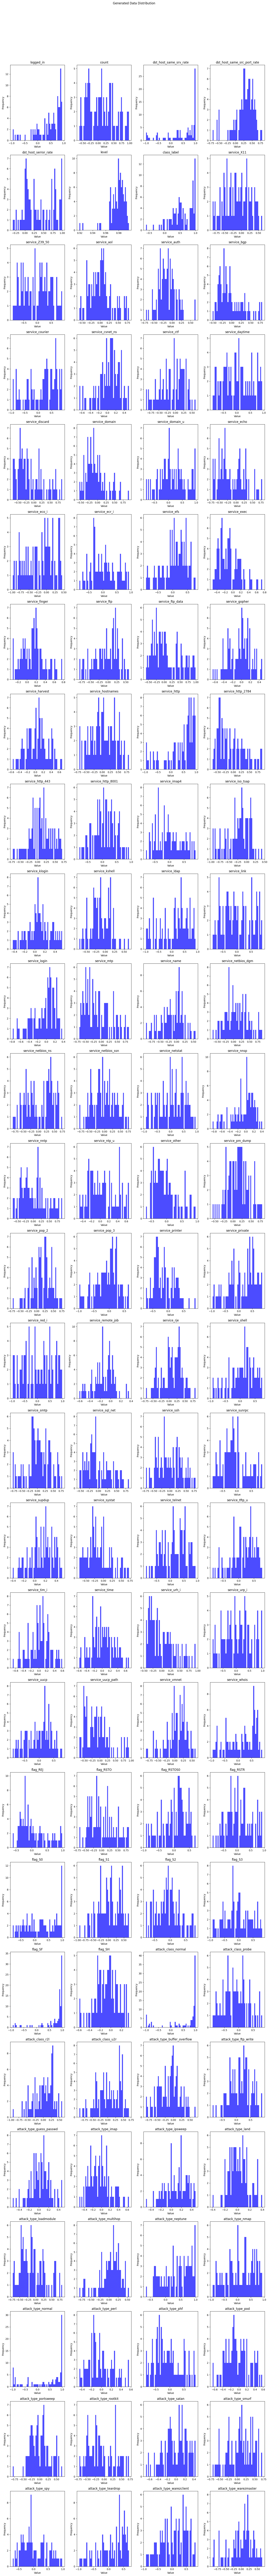

In [151]:
import matplotlib.pyplot as plt

# Defining subplot format
features_per_row = 4
num_rows = len(df.columns) // features_per_row
fig, axs = plt.subplots(num_rows, features_per_row, figsize=(15, 5 * num_rows))

# Visualize the generated samples
for row in range(num_rows):
    for col in range(features_per_row):
        feature_idx = row * features_per_row + col
        if feature_idx < len(df.columns):
            axs[row, col].hist(generated_data[:, feature_idx], bins=50, color='blue', alpha=0.7)
            axs[row, col].set_title(df.columns[feature_idx])
            axs[row, col].set_xlabel('Value')
            axs[row, col].set_ylabel('Frequency')

plt.suptitle('Generated Data Distribution', y=1.02)
plt.tight_layout()
plt.show()

### End of the noteboook, many thanks for your time! :)